# 사이킷런으로 수행하는 타이타닉 생존자 예측 

캐글에서 제공하는 타이타닉 탑승자 데이터를 기반으로 
생존자 예측을 사이킷런으로 수행

타이타닉 생존자 데이터
- 머신러닝에 입문하는 데이터 분석가/과학자를 위한 기초 예제로 제공
- 많은 캐글 이용자가 자신의 방법으로 타이타닉 생존자 예측을 수행하고
- 수행 방법을 캐글에 공유

캐글 : 데이터 분석 오픈 포탈
    - 세계적인 ML 기반 분석 대회를 온라인 상에서 주관함
    

사이킷런으로 수행하는 타이타닉 생존자 예측 과정
- 데이터 정보 확인
- 데이터 가공 (전처리)
    - (1) Null 값 처리
    - (2) Cabin 값 조정
    - (3) 생존자 파악 (성별 / 객실등급별 / 연령별)
    - (4) 레이블 인코딩 처리
    - (5) 모든 가공 내역을 함수로 작성
- 생존자 예측 프로세스
    - (1) 클래스 결정값 데이터 세트 만들기
    - (2) 학습/테스트 데이터 세트 분리
    - (3) 예측 수행
    - (4) 교차 검증
    - (5) 하이퍼 파라미터 튜닝

# 데이터 정보 확인

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic_df=pd.read_csv('data/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- Passengerid: 탑승자 데이터 일련번호
- survived: 생존 여부, 0 = 사망, 1 = 생존
- Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
- sex: 탑승자 성별
- name: 탑승자 이름
- Age: 탑승자 나이
- sibsp: 같이 탑승한 형제자매 또는 배우자 인원수
- parch: 같이 탑승한 부모님 또는 어린이 인원수
- ticket: 티켓 번호
- fare: 요금
- cabin: 선실 번호
- embarked: 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
# 데이터 컬럼 타입 확인 
print('데이터 정보\n')
print(titanic_df.info())

데이터 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
titanic_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

데이터 정보 확인
- RangeIndex: 891 entries, 0 to 890 : 전체 행 (891개 행)
- Data columns (total 12 columns): 칼럼 수 (12개)
- float64 : 2개
- int64 : 5개
- object(string) : 5개
 - (판다스는 넘파이 기반으로 만들어졌는데
 - 넘파이의 String 타입의 길이 제한이 있기 때문에 
 - 이에 대한 구분을 위해 object 타입으로 명기)
- Age : 714개 (Null값(NaN): 177개)
- Cabin : 204개 (Null값(NaN): 687개)
- Embarked : 889개 (Null값(NaN): 2개)


In [8]:
# Numm 값 개수 확인 

In [5]:
titanic_df['Age'].isnull().sum()

177

In [6]:
titanic_df['Cabin'].isnull().sum()

687

In [7]:
titanic_df['Embarked'].isnull().sum()

2

### 데이터 가공 (전처리)

In [ ]:
Null 컬럼들에 대한 처리 
- 사이킷 머신러닝 알고리즘은 Null 값을 허용하지 않는다.
- 그러므로 Null 값을 어떻게 처리할 지 결정해야 한다.
- DataFrame의 fillna() 메서드를 사용해서
- Null값을 평균 또는 고정값으로 변경
- Age : 평균 나이로 변경
- 나머지 컬럼 : 'N'으로 변경

In [8]:
# Null 처리
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

In [9]:
titanic_df['Age'].isnull().sum()

0

In [10]:
# Null 처리
titanic_df['Cabin'].fillna('N', inplace=True)

In [11]:
titanic_df['Cabin'].isnull().sum()

0

In [12]:
# Null 처리
titanic_df['Embarked'].fillna('N', inplace=True)

In [13]:
titanic_df['Embarked'].isnull().sum()

0

In [14]:
# 묻는 칼럼의 Null 값을 합산해서 Null 값이 없는지 확인한다
print('각 칼럼의 Null 값 개수:', titanic_df.isnull().sum())
print('데이터 세트 Null 값 개수:', titanic_df.isnull().sum().sum())

각 칼럼의 Null 값 개수: PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
데이터 세트 Null 값 개수: 0


In [15]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [16]:
# 문자열 피처(Sex, Cabin, Embarked) 값 분류 확인
print('Cabin 값 분포 : \n', titanic_df['Cabin'].value_counts())

Cabin 값 분포 : 
 N              687
B96 B98          4
G6               4
C23 C25 C27      4
F33              3
              ... 
A16              1
D47              1
E31              1
B39              1
E46              1
Name: Cabin, Length: 148, dtype: int64


In [17]:
# 문자열 피처(Sex, Cabin, Embarked) 값 분류 확인
print('Embarked 값 분포 : \n', titanic_df['Embarked'].value_counts())

Embarked 값 분포 : 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [18]:
# 문자열 피처(Sex, Cabin, Embarked) 값 분류 확인
print('Sex 값 분포 : \n', titanic_df['Age'].value_counts())
print('\nCabin 값 분포 : \n', titanic_df['Cabin'].value_counts())
print('\nEmbarked 값 분포 : \n', titanic_df['Embarked'].value_counts())

Sex 값 분포 : 
 29.699118    177
24.000000     30
22.000000     27
18.000000     26
30.000000     25
            ... 
53.000000      1
55.500000      1
0.920000       1
24.500000      1
70.500000      1
Name: Age, Length: 89, dtype: int64

Cabin 값 분포 : 
 N              687
B96 B98          4
G6               4
C23 C25 C27      4
F33              3
              ... 
A16              1
D47              1
E31              1
B39              1
E46              1
Name: Cabin, Length: 148, dtype: int64

Embarked 값 분포 : 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


# 문자열 피처 (Sex, Cabin, Embarked) 값 분류 설명
Sex, Embarked 값은 별 문제 없음
그러나 Cabin값 분포 중에서 'C23 C25 C27'은 앞에가 '선실등급'뒤에가'번호'로 '선실등급+번호'로 표기되어있음
- 선실 등급만 (첫 번째 문자)만 추출이 필요함
- 그래서 이 작업을 하려고 함 

In [19]:
titanic_df['Cabin']

0         N
1       C85
2         N
3      C123
4         N
       ... 
886       N
887     B42
888       N
889    C148
890       N
Name: Cabin, Length: 891, dtype: object

In [20]:
# Cabin 칼럼 값 중에서 첫 번째 문자만 추출
titanic_df['Cabin'].str[0]

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [21]:
# 이것도 첫번째 문자만 추출하라는 위랑 같은 소리임 
titanic_df['Cabin'].str[:1]

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [22]:
# Cabin 값을 선실등급만으로 표기 (선실 번호 제외)
titanic_df['Cabin']=titanic_df['Cabin'].str[0]
print(titanic_df['Cabin'].head())

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object


In [23]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C


In [24]:
# 선실등급 별 개수 확인
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

### 생존자 파악

머신러닝 알고리즘을 적용해서 예측을 수행하기 전에 데이터를 탐색한다. 
- 어떤 유형의 승객이 생존 확률이 높았는지 확인할것임
- 성별이 생존 확률에 어떤 영향을 미쳤는지 확인 
- 성별에 따른 생존자 수 비교 

In [31]:
# 성별(Sex) 분포 확인
titanic_df.groupby('Sex')['Sex'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

In [25]:
# 성별(Sex) 생존(Survived) 확인
# 사망 : 0
# 생존 : 1 

# Survived 칼럼 : 레이블로 결정 클래스 값 
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [26]:
# 여자 : 314명 중 233명 생존 (약 74.2% 생존)
# 남자 : 577명 중 109명 생존 (약 18.6% 생존)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

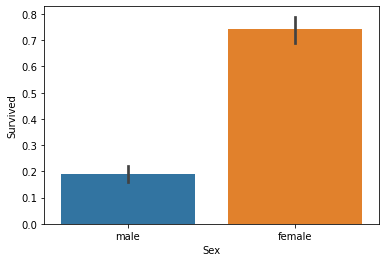

In [27]:
# 성별 생존자 : 막대 그래프 (seaborn barplot)

sns.barplot(x='Sex',y='Survived',data=titanic_df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

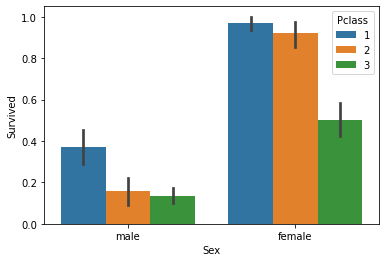

In [28]:
sns.barplot(x='Sex',y='Survived',hue='Pclass',data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

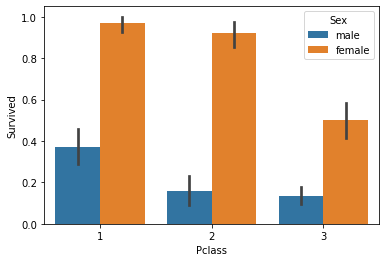

In [29]:
# 객실 등급별/성별 생존 확률
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

In [36]:
# 객실 등급별/성별 생존 확률
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

# 여성 : 1,2등실에 따른 생존확률의 차이는 크지 않으나 
         3등실의 경우 생존 확률이 상대적으로 떨어짐
# 남성 : 2,3등실 보다 1등실 생존 확률이 월등히 높음


IndentationError: unexpected indent (<ipython-input-36-1e6b0aad485f>, line 5)

In [30]:
print(set(titanic_df['Age']))

{0.75, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.69911764705882, 29.0, 31.0, 28.5, 32.0, 34.0, 35.0, 30.0, 33.0, 38.0, 39.0, 40.0, 37.0, 42.0, 36.5, 40.5, 45.0, 46.0, 47.0, 44.0, 49.0, 50.0, 51.0, 52.0, 45.5, 54.0, 55.0, 55.5, 56.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 70.5, 71.0, 14.5, 70.0, 74.0, 80.0, 20.5, 23.5, 24.5, 0.42, 30.5, 32.5, 34.5, 36.0, 41.0, 43.0, 48.0, 0.83, 0.92, 0.67, 53.0, 57.0}


In [31]:
def get_category(age):
    cat=''
    
    if age<=-1: cat='Unknown'
    elif age<=5: cat='Baby'
    elif age<=12: cat='Child'
    elif age<=18: cat='Teenager'
    elif age<=25: cat='Student'
    elif age<=35: cat='Young Adult'
    elif age<=60: cat='Adult'
    else: cat='Elderly'
        
    return cat

In [32]:
# 연령(Age) 별 생존 확률 확인

# Age의 값 종류가 많기 때문에 범위별로 분류해 카테고리 값으로 할당

# 입력 age에 따라 구분값을 반환하는 함수 설정 
# DataFrame의 apply()에서 lambda 식 사용 

def get_category(age):
    cat=''
    
    if age <= -1: cat='Unknown'                     # -1 이하는 오류 값 
    elif age <= 5: cat='Baby'
    elif age <= 12: cat='Child'
    elif age <= 18: cat='Teenager'
    elif age <= 25: cat='Student'
    elif age <= 35: cat='Young Adult'
    elif age <= 60: cat='Adult'
    else: cat='Elderly'                             # 61세 이상
        
    return cat
    

In [33]:
plt.figure(figsize=(10,6))

group_names=['Unknown','Baby','Child','Teenager','Student','Yound Adult','Adult','Elderly']




<Figure size 720x432 with 0 Axes>

In [34]:
# 연령별 막대그래프로 출력
plt.figure(figsize=(10,6))

# X축의 값을 순차적으로 표시하기 위한 설정 
group_names=['Unknown','Baby','Child','Teenager','Student','Yound Adult','Adult','Elderly']

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

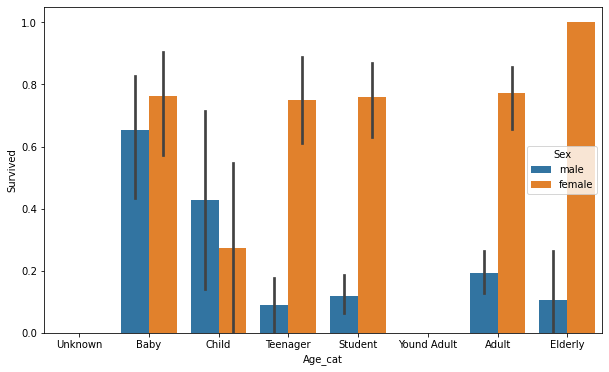

In [35]:
# 연령별 막대그래프로 출력
plt.figure(figsize=(10,6))

# X축의 값을 순차적으로 표시하기 위한 설정 
group_names=['Unknown','Baby','Child','Teenager','Student','Yound Adult','Adult','Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 호출해서 반환값으로 열로 저장
# get_category(X)는 입력값으로 'Age' 칼럼값을 받아서 해당하는 cat 카테고리를 반환
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x : get_category(x))

sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)

In [36]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S,Student
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S,Young Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C,Young Adult


In [37]:
titanic_df.drop('Age_cat',axis=1, inplace=True)

In [38]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C


In [39]:
#쌤꺼 보내줌

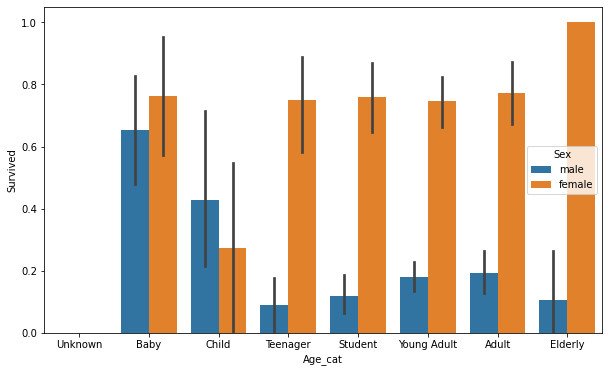

In [40]:
# 연령별 막대그래프로 출력
plt.figure(figsize=(10,6))

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 호출해서 반환값을 열로 저장
# get_category(X)는 입력값으로 'Age' 칼럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)


In [41]:
#다시 수업

In [42]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C


# 인코딩

문자열 카테고리 피처를 숫자형 카테고리 피처로 변환 
- 인코딩 : 사이킷런의 LabelEncoder 클래스 이용해서 레이블 인코딩 적용
- 0 ~ (카테고리 유형수 -1) 숫자값으로 변환    
- fit() / transform() 메서드 사용 


In [44]:
from sklearn import preprocessing

# 레이블 인코딩 함수 작성
def encode_features(dataDF):
    # 문자열 카테고리 피처
    features=['Cabin','Sex','Embarked']
    
    for feature in features:
        le=preprocessing.LabelEncoder()
        le=le.fit(dataDF[feature])
        dataDF[feature]=le.transform(dataDF[feature])
        
    return dataDF

titanic_df=encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [45]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int32  
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(3), int64(5), object(2)
memory usage: 73.2+ KB


### 지금까지 가공한 내용을 정리하고 함수로 작성 (나중에 재사용 가능)

In [46]:
import pandas as pd

In [47]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    
    return df


# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행 함수
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1] # 첫 문자만 추출
    
    features = ['Cabin', 'Sex', 'Embarked']
    
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    
    return df

# 위에서 만든 모든 함수를 한 번에 호출해서 사용하기 위한
# 함수 작성
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    
    return df


# 생존자 예측 프로세스 

In [48]:
# 클래스 결정값(레이블) 데이터 세트 만들기

# 원본 데이터 재로딩
titanic_df=pd.read_csv('data/titanic_train.csv')

# 결정값(Label)
y_titanic_df=titanic_df['Survived']

# 학습 데이터 세트
# 결정값으로 사용한 'Survived' 제외
X_titanic_df=titanic_df.drop('Survived',axis=1)

# 데이터 전처리 함수 호출
X_titanic_df=transform_features(X_titanic_df)
X_titanic_df.head()

# 생존자 예측을 수행할 피처 데이터 세트 

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


In [49]:
# 학습/ 테스트 데이터 세트 분리
# 테스트 데이터 세트 : 20%

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [50]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
333,3,1,16.0,2,0,18.0000,7,3
662,1,1,47.0,0,0,25.5875,4,3
382,3,1,32.0,0,0,7.9250,7,3
331,1,1,45.5,0,0,28.5000,2,3
149,2,1,42.0,0,0,13.0000,7,3
...,...,...,...,...,...,...,...,...
269,1,0,35.0,0,0,135.6333,2,3
337,1,0,41.0,0,0,134.5000,4,0
91,3,1,20.0,0,0,7.8542,7,3
80,3,1,22.0,0,0,9.0000,7,3


In [51]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
431,3,0,29.699118,1,0,16.1000,7,3
821,3,1,27.000000,0,0,8.6625,7,3
629,3,1,29.699118,0,0,7.7333,7,2
626,2,1,57.000000,0,0,12.3500,7,2
665,2,1,32.000000,2,0,73.5000,7,3
...,...,...,...,...,...,...,...,...
638,3,0,41.000000,0,5,39.6875,7,3
771,3,1,48.000000,0,0,7.8542,7,3
521,3,1,22.000000,0,0,7.8958,7,3
711,1,1,29.699118,0,0,26.5500,2,3


In [52]:
y_train

333    0
662    0
382    0
331    0
149    0
      ..
269    1
337    1
91     0
80     0
703    0
Name: Survived, Length: 712, dtype: int64

In [53]:
y_test

431    1
821    1
629    0
626    0
665    0
      ..
638    0
771    0
521    0
711    0
484    1
Name: Survived, Length: 179, dtype: int64

생존자 예측

3개의 ML 알고리즘 수행 
- 결정 트리, 랜덤 포레스트, 로지스틱 회귀(분류)
- 3개의 알고리즘으로 예측 수행하고 
- 교차 검증으로 평가

사이킷런 클래스
- 결정 트리 : DecisionTreeClassifier
- 랜덤 포레스트 : RandomForestClassifier
- 로지스틱 회귀(분류) : LogisticRegression
    
train_test_split()으로 분리한 학습 데이터와 테스트 데이터를 기반으로
- 머신러닝 모델을 학습하고(fit), 예측 수행(predict)
- 예측 성능평가 : 정확도 (accuracy_score() 사용)
    

참고

결정 트리
- 학습을 통해 데이터에 있는 규칙을 자동으로 찾아내서
- 트리 기반의 분류 규칙을 만드는 알고리즘이다.

랜덤 포레스트
- 대표적으로 앙상블 알고리즘
- 같은 알고리즘으로 여러 개의 분류기를 만들어서 
- 보팅으로 최종 결정하는 알고리즘

로지스틱 회귀
- 선형 회귀 방식을 분류에 적용한 알고리즘
- 선형 회귀 방식을 기반으로 하되
- 시그모이드 함수를 이용해 분류 수행 

앙상블 학습 (Ensemble Learning)
- 여러 개의 분류기를 사용해서 예측 결합함으로써 
- 보다 정확한 최종 예측을 도출하는 기법 


In [71]:
# 3개의 ML 알고리즘 사용해서 학습/예측/평가 수행

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, 랜덤 포레스트, 로지스틱 회귀를 위한 
# 사이킷런 Classifier 객체 생성
dt_clf=DecisionTreeClassifier(random_state=11)
rf_clf=RandomForestClassifier(random_state=11)
lr_clf=LogisticRegression()

# DesicionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred=dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test,dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred=rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test,rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred=lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test,lr_pred)))

# RandomForestClassifier 정확도 : 0.8547가 가장 높음
# 아직 최적화 작업을 수행하지 않았고
# 데이터 양도충분하지 않기 때문에
# 어떤 알고리즘이 가장 성능이 좋다고 평가할 수 없음

DecisionTreeClassifier 정확도 : 0.7877
RandomForestClassifier 정확도 : 0.8547
LogisticRegression 정확도 : 0.8492


In [ ]:
##위에 이상함 다시확인할필요있음 

In [ ]:
교차 검증으로 결정 트리 모델 좀 더 평가
- 사이킷런의 model_selection 패키지의
- KFold, cross_val_score(), GridSearchCV 클래스 사용


In [55]:
# 결정 트리 모델에 대해 KFold 클래스를 이용해 교차 검증을 수행 
# 폴더 개수 : 5개 

from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트가 5개인 KFold 객체 생성
    kfold=KFold(n_splits=folds)
    # 예측 평균 정확도 저장을 위한 리스트 객체 생성
    scores=[]
    
    # KFold 교차 검증 수행 : enumerate(), iter_count(자동 증가) 사용 
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test=X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test=y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions=clf.predict(X_test)
        accuracy=accuracy_score(y_test,predictions)
        scores.append(accuracy)
        
        print("교차 검증 {0} 정확도:{1:.4f}".format(iter_count,accuracy))
        
        # 5개 fold에서의 평균 정확도 계산
        mean_score=np.mean(scores)
        print("평균 정확도:{0:.4f}".format(mean_score))
        
#exec_kfold 호출
exec_kfold(dt_clf,folds=5)

교차 검증 0 정확도:0.7542
평균 정확도:0.7542
교차 검증 1 정확도:0.7809
평균 정확도:0.7675
교차 검증 2 정확도:0.7865
평균 정확도:0.7739
교차 검증 3 정확도:0.7697
평균 정확도:0.7728
교차 검증 4 정확도:0.8202
평균 정확도:0.7823


In [56]:
# cross_val_score() 이용해서 교차 검증 수행
from sklearn.model_selection import cross_val_score

scores=cross_val_score(dt_clf,X_titanic_df,y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count,accuracy))
    
print("평균 정확도:{0:.4f}".format(np.mean(scores)))

# 결과
# 앞에서 수행한 K 폴드 교차 검증 결과 : 평균 정확도 0.7823
# cross_val_score() : 평균 정확도 0.7879
# 높은 이유 : cross_val_score() StratifiedKFold를 이용해서 폴드 세트를 분할하기 때문에


교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7753
교차 검증 2 정확도 : 0.7921
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.8427
평균 정확도:0.7879


### GridSearchCV 클래스를 이용해 하이퍼 파라미터 튜닝 

In [57]:
# DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능 측정
# CV : 5개 폴드 세트 지정
# 하이퍼 파라미터 : max_depth, min_samples_split,min_samples_leaf
# 하이퍼 파라미터 값을 변경하면서 성능 측정
# 최적 하이퍼 파라미터와 그때의 예측 출력하고
# 최적 하이퍼 파라미터로 학습된 extimator를 이용해
# 분리된 테스트 데이터 세트에 예측을 수행해서
# 예측 정확도 출력

from sklearn.model_selection import GridSearchCV

In [58]:
# 하이퍼 파라미터 설정
parameters={'max_depth':[2,3,5,10],
           'min_samples_split':[2,3,5],
            'min_samples_leaf':[1,5,8]}

grid_dclf=GridSearchCV(dt_clf,param_grid=parameters,scoring='accuracy',cv=5)
grid_dclf.fit(X_train,y_train)

print('GridSearchCV 최적 하이퍼 파라미터:',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dclf.best_score_))
best_dclf=grid_dclf.best_estimator_  # 최고 점수를 낸 파라미터를 가진 모형 
# 최적의 파라미터로 학습을 끝내서 더 똑똑해진 거가 예측해줌

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
pred=best_dclf.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print('테스트 세트에서의 DecisionTreeClassifier 정확도:{0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도:0.8715


In [59]:
# 결과
# 최적의 하이퍼 파라미터로 학습시킨 뒤 예측 정확도가 87.15%로 향상되었음 
# 앞에서는 78.79%였음

# 하이퍼 파라미터 변경 전 보다 약 8% 이상 증가함
# 일반적으로 하이퍼 파라미터를 튜닝하더라도 이정도 수준으로 증가하기 매우 어려움
# 테스트용 데이터 세트가 작기 때문에 수치상으로 예측 성능이 많이 증가한 것으로 보임
